In [187]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib.dates as mdates


pd.options.mode.chained_assignment = None

In [354]:
raw_data = pd.read_excel('MideaRawInput.xlsx', sheet_name='原始数据')
# raw_data.head()
# raw_data.isnull().sum()

In [378]:
# delete the columns which have the same value in the whole day
# delete multiple time records
# 'existwaterflow' was deleted b/c it has less info than "waterflow" 
# The status of 'bottomheatingtubesw'&'topheatingtubesw' is consistent with "switch", so I will not keep them
# "need update clock" is also dropped

cols = ['time','switch','heatingstatus','keepwarmstatus','currenttemp','waterremaining',
       'waterflow','heatremainmins','settemp','heatertoptemp', 'inwatertemp']
data = raw_data[cols]

data['time']=pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')
data['switch'] = data['switch'].map({'开机':1,'关机':0})
data['heatingstatus'] = data['heatingstatus'].map({'开':1,'关':0})
data['keepwarmstatus'] = data['keepwarmstatus'].map({'开':1,'关':0})
data['waterflow'] = data['waterflow']/600  # change the unit from L/(10 min) to L/s
# data = data[data['waterflow']>0]
data
# data.shape
# data.isnull().sum()

,time,switch,heatingstatus,keepwarmstatus,currenttemp,waterremaining,waterflow,heatremainmins,settemp,heatertoptemp,inwatertemp
0,2020-03-18 07:40:33,1,1,0,41,30,0.000000,20,55,41,38
1,2020-03-18 07:40:34,1,1,0,41,30,0.000000,20,55,41,38
2,2020-03-18 07:40:52,1,1,0,41,30,0.010000,20,55,41,38
3,2020-03-18 07:40:53,1,1,0,41,30,0.018333,20,55,41,38
4,2020-03-18 07:40:54,1,1,0,41,30,0.000000,20,55,41,38
...,...,...,...,...,...,...,...,...,...,...,...
1132,2020-03-18 20:48:54,1,1,0,53,60,0.061667,3,55,53,50
1133,2020-03-18 20:48:54,1,1,0,53,60,0.063333,3,55,53,50
1134,2020-03-18 20:48:56,1,1,0,53,60,0.035000,3,55,53,50
1135,2020-03-18 20:48:57,1,0,1,53,60,0.010000,3,55,53,50


In [357]:
# import seaborn as sns
# sns.pairplot(data[['switch','heatingstatus','keepwarmstatus']])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

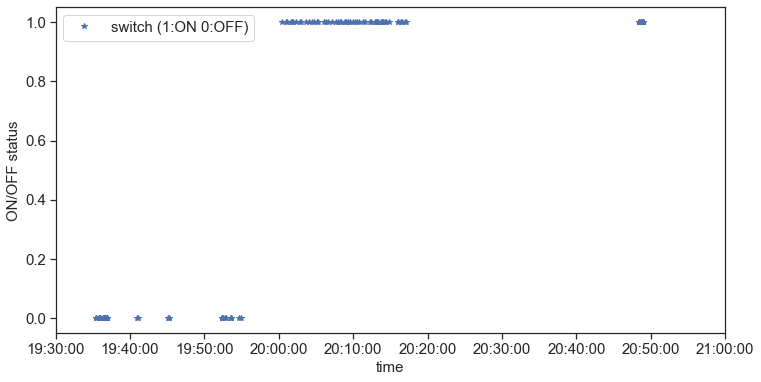

In [379]:
switchplot = data[['time','switch','heatingstatus','keepwarmstatus']]
switchplot.set_index('time', inplace=True)
switchplot.index = pd.to_datetime(switchplot.index)

plt.figure(figsize=(12,6))
plt.plot(switchplot.index,switchplot['switch'],'*',label ='switch (1:ON 0:OFF)')
# plt.plot(switchplot.index,switchplot['heatingstatus'],'.',label = 'heatingstatus')
# plt.plot(switchplot.index,switchplot['keepwarmstatus'],'*',color='green')

plt.legend(frameon=True, fontsize=15)

ax=plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) #'%Y-%m-%d %H:%M:%S'
ax.set_xlim(pd.Timestamp('2020-03-18 19:30:00'),pd.Timestamp('2020-03-18 21:00:00'))
# ax.set_ylim(0,1)
ax.set_xlabel('time',fontsize=15)
ax.set_ylabel('ON/OFF status',fontsize=15)
# when the WaterHeater is ON, it's not always heating. 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

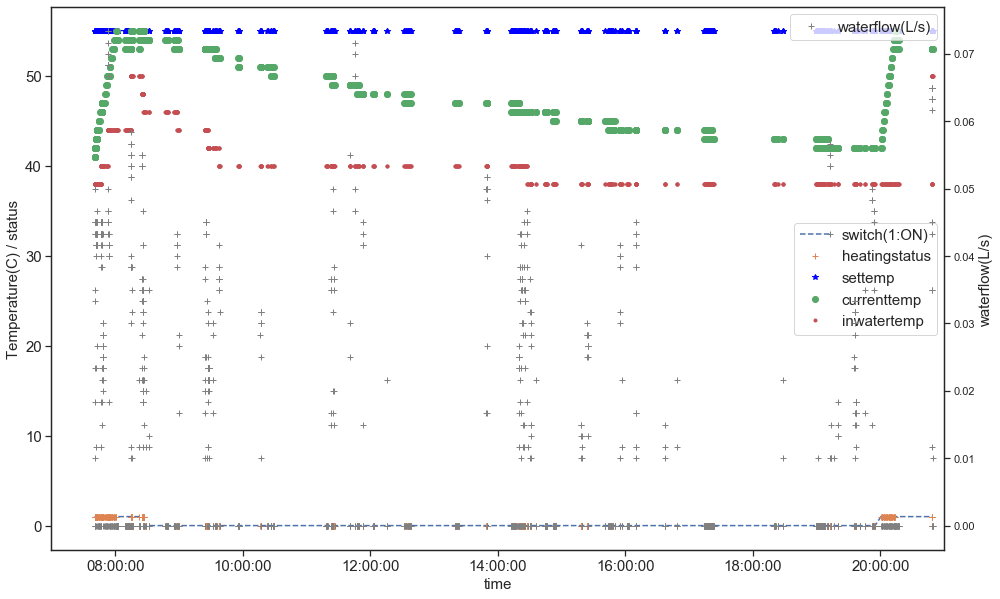

In [405]:
numplot = data[['time','switch','heatingstatus','currenttemp','waterremaining','waterflow','heatremainmins',
                'settemp','inwatertemp','heatertoptemp']] 
numplot.set_index('time', inplace=True)
numplot.index = pd.to_datetime(numplot.index)

plt.figure(figsize=(16,10))
plt.plot(numplot.index,numplot['switch'],'--',label ='switch(1:ON)')
plt.plot(numplot.index,numplot['heatingstatus'],'+',label = 'heatingstatus')
# plt.plot(numplot.index,numplot['heatertoptemp'],'<',label = 'heatertoptemp') # a little bit higher than current temp, delete it
# plt.plot(numplot.index,numplot['waterremaining'],'<',label = 'waterremaning')
# plt.plot(numplot.index,numplot['heatremainmins'],'<',label = 'heatremainmins')

plt.plot(numplot.index,numplot['settemp'],'*',color='blue', label = 'settemp')
plt.plot(numplot.index,numplot['currenttemp'],'o',label = 'currenttemp')
plt.plot(numplot.index,numplot['inwatertemp'],'.',label = 'inwatertemp')

plt.legend(frameon=True, prop={'size':15},loc='best') #loc='lower center',bbox_to_anchor=(1.1,1.05)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax=plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) #'%Y-%m-%d %H:%M:%S'
ax.set_xlim(pd.Timestamp('2020-03-18 07:00:00'),pd.Timestamp('2020-03-18 21:00:00'))
# ax.set_xlim(pd.Timestamp('2020-03-18 07:30:00'),pd.Timestamp('2020-03-18 9:00:00'))
# ax.set_ylim(0,1)
ax.set_xlabel('time',fontsize=15)
ax.set_ylabel('Temperature(C) / status',fontsize=15)

ax2 = ax.twinx()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) #'%Y-%m-%d %H:%M:%S'
ax2.plot(numplot.index, numplot['waterflow'],'+',color='gray', label='waterflow(L/s)')
ax2.set_ylabel('waterflow(L/s)', fontsize=15)
ax2.legend(loc=0, fontsize=15)

In [411]:
# calcualte # of WaterUse instances

threshold=pd.Timedelta(minutes=4) #Assume "delta t>4min" means a formal instance. We can change this value if needed.
data['time']=pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')
data_usewater=data[data['waterflow'] > 0]    #only select the rows that has non-0 waterflow
d = (data_usewater['time'].diff()>threshold)  #compare the records, are the difference bigger than 4 min?

data_usewater['#ofusewater']=d.cumsum()+1    #count the # of instances
# data_usewater.to_excel('outputfile.xlsx')  # https://blog.csdn.net/y1535766478/java/article/details/77936394
data_usewater.reset_index(drop=True, inplace=True)
data_usewater.head()

,time,switch,heatingstatus,keepwarmstatus,currenttemp,waterremaining,waterflow,heatremainmins,settemp,heatertoptemp,inwatertemp,#ofusewater
0,2020-03-18 07:40:52,1,1,0,41,30,0.010000,20,55,41,38,1
1,2020-03-18 07:40:53,1,1,0,41,30,0.018333,20,55,41,38,1
2,2020-03-18 07:41:00,1,1,0,41,30,0.033333,19,55,41,38,1
3,2020-03-18 07:41:01,1,1,0,42,30,0.045000,19,55,41,38,1
4,2020-03-18 07:41:02,1,1,0,42,30,0.043333,19,55,41,38,1


In [413]:
data_agg = data_usewater.groupby('#ofusewater').agg({'switch':lambda x:x.value_counts().index[0], #'heatingstatus':lambda x:x.value_counts().index[0],
                                                     'time':['first','last'],
                                                     'waterflow':['mean'],
                                                    'currenttemp':['mean'],
                                                     'inwatertemp':['mean']#'waterremaining':['min']
                                                    })
data_agg.columns = ['_'.join(x) for x in data_agg.columns.ravel()]

data_agg['timeperiod']=(data_agg['time_last']-data_agg['time_first'])

data_agg['water_total(L)'] = round(data_agg['waterflow_mean']*(data_agg['timeperiod'].dt.total_seconds()))
data_agg = data_agg[data_agg['water_total(L)']> 0.1]
data_agg['energyuse(KWh)']=(((55 - data_agg['inwatertemp_mean'])*9/5+32)*(data_agg['water_total(L)']*0.264)*8.33*1/(3412*0.85))*data_agg['switch_<lambda>']
                            # C to F: (C *9/5)+32 
                            # 0.264: L -> gal; 
                            # 8.33: water specfic weight (lb/gal); 
                            # 0.85: uniform energy factor (UEF)
data_agg.reset_index(drop=True, inplace=True)
data_agg
# # This WaterHeater is big enough for this family ('water remaining'>=30)
# # Even though the set temperature is 55C, the 'currenttemp' is alway lower than that. Will this bother the user?

,switch_<lambda>,time_first,time_last,waterflow_mean,currenttemp_mean,inwatertemp_mean,timeperiod,water_total(L),energyuse(KWh)
0,1,2020-03-18 07:40:52,2020-03-18 07:48:43,0.038280,44.851613,38.993548,00:07:51,18.0,0.830004
1,1,2020-03-18 07:53:10,2020-03-18 07:53:52,0.052414,50.000000,43.724138,00:00:42,2.0,0.079309
2,1,2020-03-18 08:14:35,2020-03-18 08:15:44,0.042901,53.703704,48.888889,00:01:09,3.0,0.097816
3,1,2020-03-18 08:22:45,2020-03-18 08:31:46,0.029068,54.372881,47.864407,00:09:01,16.0,0.544059
4,0,2020-03-18 08:58:29,2020-03-18 08:59:57,0.036167,53.700000,45.000000,00:01:28,3.0,0.000000
5,0,2020-03-18 09:24:22,2020-03-18 09:32:00,0.024891,53.000000,42.786885,00:07:38,11.0,0.000000
6,0,2020-03-18 09:37:50,2020-03-18 09:38:10,0.036667,52.000000,40.600000,00:00:20,1.0,0.000000
7,0,2020-03-18 11:22:49,2020-03-18 11:26:18,0.030686,49.529412,40.000000,00:03:29,6.0,0.000000
8,0,2020-03-18 13:49:18,2020-03-18 13:49:31,0.041061,47.000000,40.000000,00:00:13,1.0,0.000000
9,0,2020-03-18 14:19:41,2020-03-18 14:31:16,0.029134,46.051948,39.636364,00:11:35,20.0,0.000000


In [463]:
data_sum = data_agg[['switch_<lambda>','time_first','timeperiod','water_total(L)','energyuse(KWh)']]
data_sum

,switch_<lambda>,time_first,timeperiod,water_total(L),energyuse(KWh)
0,1,2020-03-18 07:40:52,00:07:51,18.0,0.830004
1,1,2020-03-18 07:53:10,00:00:42,2.0,0.079309
2,1,2020-03-18 08:14:35,00:01:09,3.0,0.097816
3,1,2020-03-18 08:22:45,00:09:01,16.0,0.544059
4,0,2020-03-18 08:58:29,00:01:28,3.0,0.000000
5,0,2020-03-18 09:24:22,00:07:38,11.0,0.000000
6,0,2020-03-18 09:37:50,00:00:20,1.0,0.000000
7,0,2020-03-18 11:22:49,00:03:29,6.0,0.000000
8,0,2020-03-18 13:49:18,00:00:13,1.0,0.000000
9,0,2020-03-18 14:19:41,00:11:35,20.0,0.000000


In [464]:
data_sum1=data_sum.agg({'timeperiod':['sum'],
             'water_total(L)':['sum'],
             'energyuse(KWh)':['sum']})
data_sum1

,timeperiod,water_total(L),energyuse(KWh)
sum,00:55:46,103.0,1.626854


In [466]:
data_switchon = data_agg[data_agg['switch_<lambda>']!=0]
data_switchon.drop(columns = ['switch_<lambda>','time_last','waterflow_mean'])

data_switchon1 = data_switchon.agg({'timeperiod':['sum'],
                                    'water_total(L)':['sum'],
                                   'energyuse(KWh)':['sum']})
data_switchon1

,timeperiod,water_total(L),energyuse(KWh)
sum,00:19:17,41.0,1.626854
